In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('final_dataset.csv')

In [8]:
df1

,Type,air_temp,process_temp,speed,torque,tool_wear,Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...,...
9968,1,298.8,308.4,1604,29.5,14,0,0
9969,2,298.9,308.4,1632,31.8,17,0,0
9970,1,299.0,308.6,1645,33.4,22,0,0
9971,2,299.0,308.7,1408,48.5,25,0,0


In [3]:
# MODEL BUILDING PROCESS
# splitting in dependent and independent variable

In [4]:
# import the algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
x=df1.drop(["Target","Failure Type"],axis=1)
x.head()

,Type,air_temp,process_temp,speed,torque,tool_wear
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9


In [6]:
# SCALING
# As there are extreme outlier we can use Robust scaler or Min Max scaler. 

In [7]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [9]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Type,air_temp,process_temp,speed,torque,tool_wear
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035573


In [10]:
# we have two dependent variable in this dataset
# lets start the model building with Target variable

In [11]:
Y=df1["Target"]

In [12]:
# lets try Train test split approach

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,Y,train_size=0.80,stratify=Y,random_state=42)

In [15]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()
svc=SVC() # Support vector classification
knn=KNeighborsClassifier()

In [16]:
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)

<AxesSubplot:>

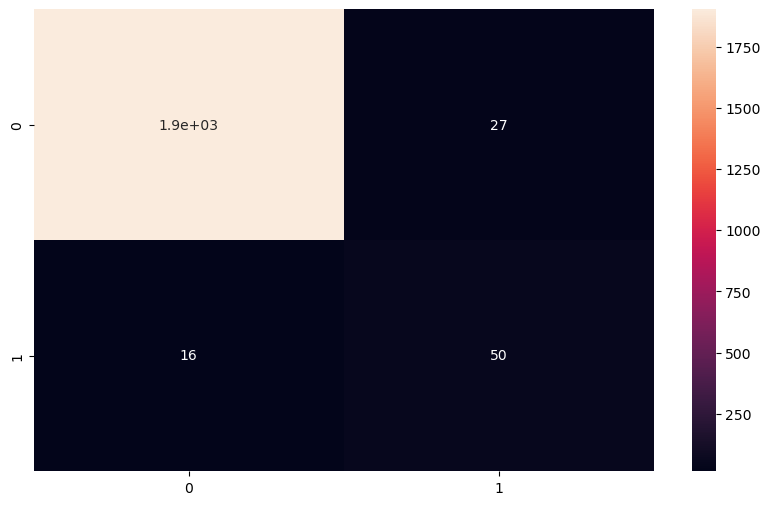

In [17]:
cm=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)

In [18]:
print('Accuracy score:',accuracy_score(Y_test,y_pred))
print('classification report','\n',classification_report(Y_test,y_pred))
print('roc_auc_score-',roc_auc_score(Y_test,y_pred))
print('MACRO Precision_recall_F1-',precision_recall_fscore_support(Y_test,y_pred, average='macro'))

Accuracy score: 0.9784461152882206
classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.65      0.76      0.70        66

    accuracy                           0.98      1995
   macro avg       0.82      0.87      0.84      1995
weighted avg       0.98      0.98      0.98      1995

roc_auc_score- 0.8717894339978322
MACRO Precision_recall_F1- (0.8205043132050431, 0.8717894339978322, 0.8440615791798531, None)


In [19]:
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.91      0.62      0.74        66

    accuracy                           0.99      1995
   macro avg       0.95      0.81      0.87      1995
weighted avg       0.98      0.99      0.98      1995



In [20]:
bg.fit(X_train,Y_train)
y_pred_bg=bg.predict(X_test)
print(classification_report(Y_test,y_pred_bg))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.94      0.67      0.78        66

    accuracy                           0.99      1995
   macro avg       0.96      0.83      0.89      1995
weighted avg       0.99      0.99      0.99      1995



In [21]:
svc.fit(X_train,Y_train)
y_pred_svc=svc.predict(X_test)
print(classification_report(Y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1929
           1       1.00      0.14      0.24        66

    accuracy                           0.97      1995
   macro avg       0.99      0.57      0.61      1995
weighted avg       0.97      0.97      0.96      1995



In [22]:
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1929
           1       0.75      0.27      0.40        66

    accuracy                           0.97      1995
   macro avg       0.86      0.63      0.69      1995
weighted avg       0.97      0.97      0.97      1995



In [24]:
# Random forest and bagging classifier performed better then others. 

In [25]:
# But the data is imbalanced, lets balanced the data.

In [26]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE

In [27]:
smote = SMOTE()
adasyn=ADASYN()
over=RandomOverSampler()
border=BorderlineSMOTE()

In [28]:
for model in[rf,bg]:
    print("======="*8)
    print("AFTER data-Balancing Performance:-",model)
    print("======="*8)
    for balancer in[smote,border,adasyn]:
        X_train_1, Y_train_1 = balancer.fit_resample(X_train, Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        print(model,"using technique:- ",balancer)
        #print("======="*6) 
        print("======="*8) 
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        print("ROC_AUC \n",ROC) 
        print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
        print("======="*8)
        print("Conclude one balaning method")
        print("======="*8)
        
        print("======="*8)

AFTER data-Balancing Performance:- RandomForestClassifier()
RandomForestClassifier() using technique:-  SMOTE()
confusion matrix 
 [[1876   53]
 [  14   52]]
Accuracy 
 0.9664160401002506
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1929
           1       0.50      0.79      0.61        66

    accuracy                           0.97      1995
   macro avg       0.74      0.88      0.80      1995
weighted avg       0.98      0.97      0.97      1995

ROC_AUC 
 0.8802017060181913
MACRO Precision_recall_F1 
 (0.7439153439153439, 0.8802017060181913, 0.7953216374269005, None)
Conclude one balaning method
RandomForestClassifier() using technique:-  BorderlineSMOTE()
confusion matrix 
 [[1890   39]
 [  12   54]]
Accuracy 
 0.9744360902255639
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.58      0.82    

In [29]:
# Till now we observed Randon forest and bagging classifier with smote technique gives the best result.

In [ ]:
# Lets verify using StratifiedShuffleSplit

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict,cross_validate

In [31]:
# lets try using StratifiedShuffleSplit and cross_validate to analyze the performance of algorithem 

In [32]:
for model in[rf,bg]:
    print("======="*5)
    print("Performance of",model)
    print("======="*5)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=42)
    scoring=["roc_auc","f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,x_scaled,Y,scoring=scoring,cv=cv)
    roc_auc_test_cv=round(cross_val_scores["test_roc_auc"].mean(),4)
    f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4)
    precisio_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4)
    Recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)
    
    # print of metrics
    print("ROC AUC",roc_auc_test_cv) 
    print("F1 MACRO",f1_test_cv) 
    print("PRECISION MACRO",precisio_test_cv) 
    print("RECALL MACRO",Recall_test_cv) 

Performance of RandomForestClassifier()
ROC AUC 0.9765
F1 MACRO 0.8569
PRECISION MACRO 0.9451
RECALL MACRO 0.8001
Performance of BaggingClassifier()
ROC AUC 0.9455
F1 MACRO 0.8718
PRECISION MACRO 0.9352
RECALL MACRO 0.8268


In [ ]:
"""
All results are using cross validation:

Bagging is the best overall model, with highest f1 score and second highest roc auc.
Random Forest has a slightly highest roc auc than Balanced Bagging, 
but its f1 score is lower.
"""

In [33]:
# Conclusion- The Bagging classifier gives the best result with smote technique 

In [34]:
# Lets train the final model using bagging classifier with smote technique on complete data set.

In [35]:
smote = SMOTE()
bg=BaggingClassifier()

In [36]:
X_features, Y_target = smote.fit_resample(x_scaled, Y)
component_failure_prediction = bg.fit(X_features,Y_target)

In [37]:
import pickle
# Save the model to a file
with open('failure_prediction_model.pkl', 'wb') as file:
    pickle.dump(component_failure_prediction, file)